```
 id : 선수 고유의 아이디
 name : 이름
 age : 나이
 continent : 선수들의 국적이 포함되어 있는 대륙입니다
 contract_until : 선수의 계약기간이 언제까지인지 나타내어 줍니다
 position : 선수가 선호하는 포지션입니다. ex) 공격수, 수비수 등
 prefer_foot : 선수가 선호하는 발입니다. ex) 오른발
 reputation : 선수가 유명한 정도입니다. ex) 높은 수치일 수록 유명한 선수
 stat_overall : 선수의 현재 능력치 입니다.
 stat_potential : 선수가 경험 및 노력을 통해 발전할 수 있는 정도입니다.
 stat_skill_moves : 선수의 개인기 능력치 입니다.
 value : FIFA가 선정한 선수의 이적 시장 가격 (단위 : 유로) 입니다
 ```

In [1]:
#모듈 불러오기
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import koreanize_matplotlib

In [2]:
# 데이터 불러오기
base_path = "FIFA"
train = pd.read_csv(f"{base_path}/FIFA_train.csv")
test = pd.read_csv(f"{base_path}/FIFA_test.csv")
submission = pd.read_csv(f"{base_path}/submission.csv")

print(train.shape, test.shape,submission.shape)
train.head(4)

(8932, 12) (3828, 11) (3828, 2)


,id,name,age,continent,contract_until,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves,value
0,0,L. Messi,31,south america,2021,ST,left,5.0,94,94,4.0,110500000.0
1,3,De Gea,27,europe,2020,GK,right,4.0,91,93,1.0,72000000.0
2,7,L. Suárez,31,south america,2021,ST,right,5.0,91,91,3.0,80000000.0
3,8,Sergio Ramos,32,europe,2020,DF,right,4.0,91,91,3.0,51000000.0


In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8932 entries, 0 to 8931
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                8932 non-null   int64  
 1   name              8932 non-null   object 
 2   age               8932 non-null   int64  
 3   continent         8932 non-null   object 
 4   contract_until    8932 non-null   object 
 5   position          8932 non-null   object 
 6   prefer_foot       8932 non-null   object 
 7   reputation        8932 non-null   float64
 8   stat_overall      8932 non-null   int64  
 9   stat_potential    8932 non-null   int64  
 10  stat_skill_moves  8932 non-null   float64
 11  value             8932 non-null   float64
dtypes: float64(3), int64(4), object(5)
memory usage: 837.5+ KB


In [4]:
train["position"].value_counts()

MF    3428
DF    2791
ST    1705
GK    1008
Name: position, dtype: int64

In [5]:
train.isnull().sum().sum()

0

In [6]:
test.isnull().sum().sum()

0

In [7]:
train.describe(include = "O")

,name,continent,contract_until,position,prefer_foot
count,8932,8932,8932,8932,8932
unique,8932,5,17,4,2
top,L. Messi,europe,2019,MF,right
freq,1,5322,2366,3428,6837


In [8]:
train.describe()

,id,age,reputation,stat_overall,stat_potential,stat_skill_moves,value
count,8932.000000,8932.000000,8932.000000,8932.000000,8932.000000,8932.000000,8.932000e+03
mean,7966.775750,25.209136,1.130878,67.091133,71.997201,2.401702,2.778673e+06
std,4844.428521,4.635515,0.423792,6.854910,5.988147,0.776048,5.840982e+06
min,0.000000,16.000000,1.000000,47.000000,48.000000,1.000000,1.000000e+04
25%,3751.750000,21.000000,1.000000,63.000000,68.000000,2.000000,3.750000e+05
50%,7696.500000,25.000000,1.000000,67.000000,72.000000,2.000000,8.250000e+05
75%,12082.250000,28.000000,1.000000,72.000000,76.000000,3.000000,2.600000e+06
max,16948.000000,40.000000,5.000000,94.000000,94.000000,5.000000,1.105000e+08


In [9]:
test.describe()

,id,age,reputation,stat_overall,stat_potential,stat_skill_moves
count,3828.000000,3828.000000,3828.000000,3828.000000,3828.000000,3828.000000
mean,7846.258098,25.297806,1.143939,67.336991,72.107628,2.414838
std,4870.339361,4.628236,0.448465,6.908814,6.133428,0.781153
min,1.000000,16.000000,1.000000,47.000000,52.000000,1.000000
25%,3466.250000,22.000000,1.000000,63.000000,68.000000,2.000000
50%,7643.500000,25.000000,1.000000,67.000000,72.000000,2.000000
75%,11967.000000,29.000000,1.000000,72.000000,76.000000,3.000000
max,16943.000000,42.000000,5.000000,94.000000,95.000000,5.000000


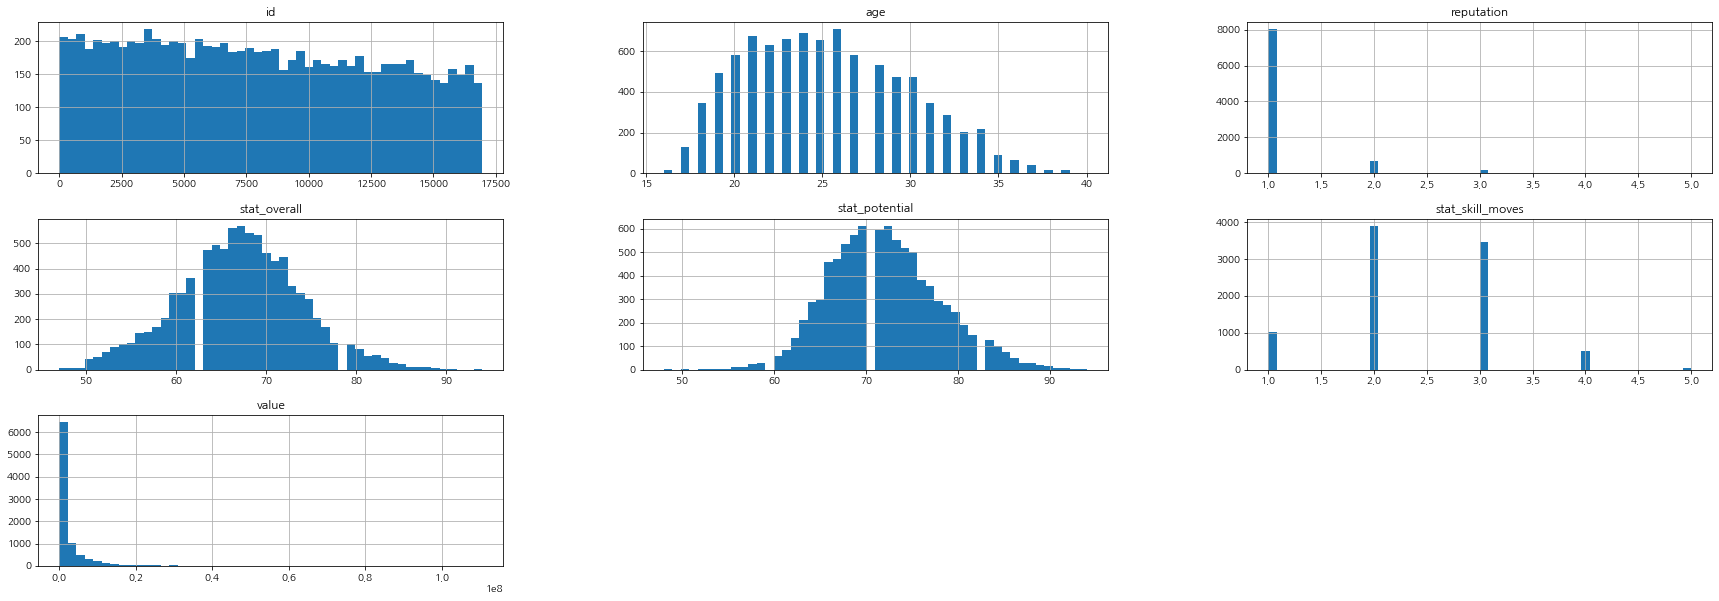

In [10]:
train.hist(figsize = (30,10), bins =50);

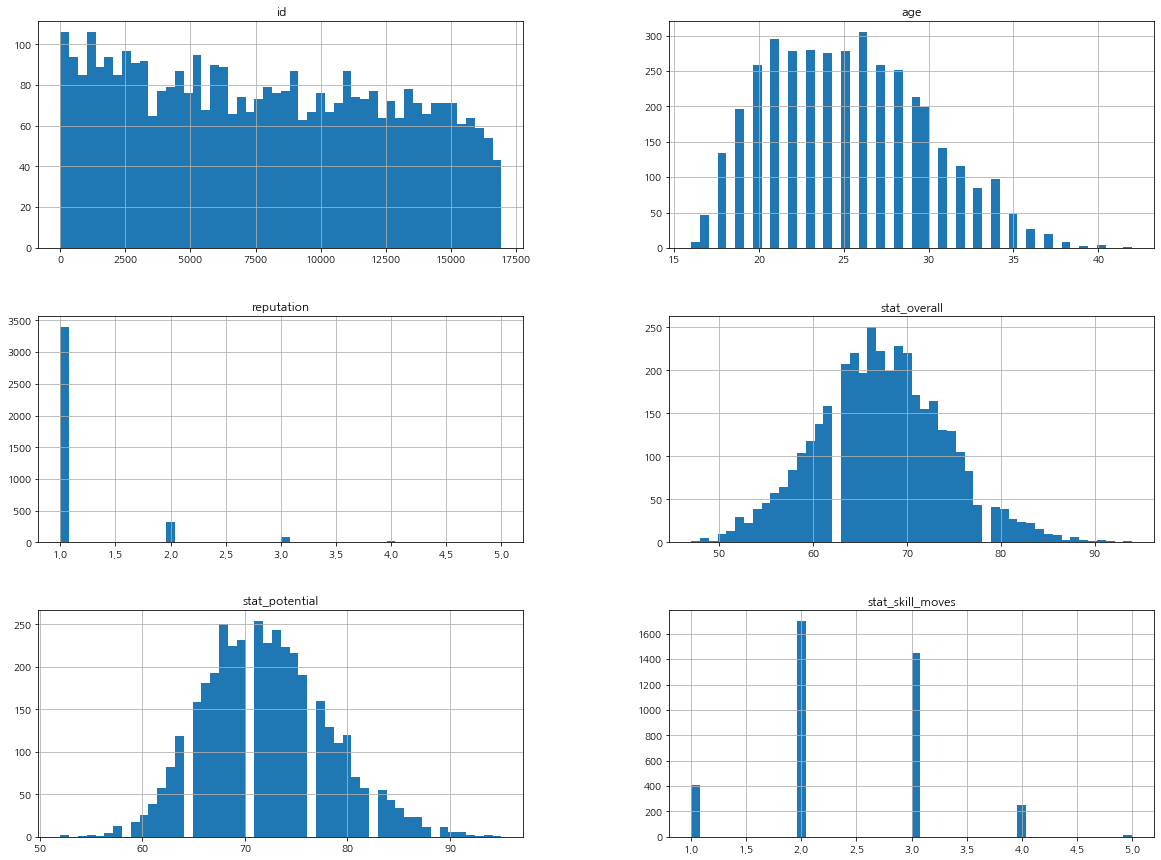

In [11]:
test.hist(figsize = (20,15), bins =50);

In [12]:
train.nunique()

id                  8932
name                8932
age                   25
continent              5
contract_until        17
position               4
prefer_foot            2
reputation             5
stat_overall          46
stat_potential        45
stat_skill_moves       5
value                198
dtype: int64

In [13]:
train.drop(['id','name'], axis = 1,inplace = True)
test.drop(['id','name'], axis = 1,inplace = True)

In [14]:
train["contract_until"].value_counts()

2019            2366
2021            2308
2020            2041
2022             761
2023             506
Jun 30, 2019     501
2018             327
Dec 31, 2018      64
May 31, 2019      19
2024              12
Jan 31, 2019      10
Jun 30, 2020       9
2025               3
Jan 1, 2019        2
2026               1
May 31, 2020       1
Jan 12, 2019       1
Name: contract_until, dtype: int64

In [15]:
def func(string:object) -> int:
    string = string[-4:]
    return int(string)

train['contract_until'] = train['contract_until'].apply(func)
test['contract_until'] = test['contract_until'].apply(func)

In [16]:
train['prefer_foot'].value_counts()

right    6837
left     2095
Name: prefer_foot, dtype: int64

In [17]:
train['continent'].value_counts()

europe           5322
south america    1927
asia              787
africa            721
oceania           175
Name: continent, dtype: int64

In [18]:
train['position'].value_counts()

MF    3428
DF    2791
ST    1705
GK    1008
Name: position, dtype: int64

In [19]:
train["right_foot"] = (train["prefer_foot"] == "right")
test["right_foot"] = (test["prefer_foot"] == "right")

In [20]:
train["position_MF"] = train["position"] == "MF"
train["position_DF"] = train["position"] == "DF"
train["position_ST"] = train["position"] == "ST"
train["position_GK"] = train["position"] == "GK"
train[["position_MF","position_DF","position_ST","position_GK"]].head(2)

,position_MF,position_DF,position_ST,position_GK
0,False,False,True,False
1,False,False,False,True


In [21]:
test["position_MF"] = test["position"] == "MF"
test["position_DF"] = test["position"] == "DF"
test["position_ST"] = test["position"] == "ST"
test["position_GK"] = test["position"] == "GK"
test[["position_MF","position_DF","position_ST","position_GK"]].head(2)

,position_MF,position_DF,position_ST,position_GK
0,False,False,True,False
1,False,False,True,False


In [22]:
train["continent_E"] = train["continent"] == "europe"
train["continent_Sa"] = train["continent"] == "south america"
train["continent_A"] = train["continent"] == "asia"
train["continent_Af"] = train["continent"] == "africa"
train["continent_O"] = train["continent"] == "oceania"

In [23]:
test["continent_E"] = test["continent"] == "europe"
test["continent_Sa"] = test["continent"] == "south america"
test["continent_A"] = test["continent"] == "asia"
test["continent_Af"] = test["continent"] == "africa"
test["continent_O"] = test["continent"] == "oceania"

In [24]:
set(train.columns) - set(test.columns)

{'value'}

In [25]:
train["value"].describe()

count    8.932000e+03
mean     2.778673e+06
std      5.840982e+06
min      1.000000e+04
25%      3.750000e+05
50%      8.250000e+05
75%      2.600000e+06
max      1.105000e+08
Name: value, dtype: float64

In [26]:
print("왜도(Skewness):", train["value"].skew())
print("첨도(Kurtosis):", train["value"].kurtosis())

왜도(Skewness): 5.885798215027292
첨도(Kurtosis): 52.05051473763727


In [27]:
train['value_log1p'] = np.log1p(train["value"])

array([[<AxesSubplot:title={'center':'value'}>,
        <AxesSubplot:title={'center':'value_log1p'}>]], dtype=object)

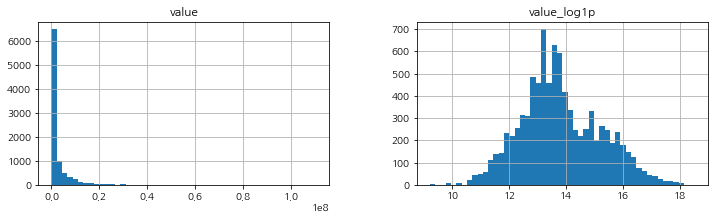

In [28]:
train[['value','value_log1p']].hist(figsize=(12,3), bins = 50)

<AxesSubplot:xlabel='value_log1p', ylabel='Density'>

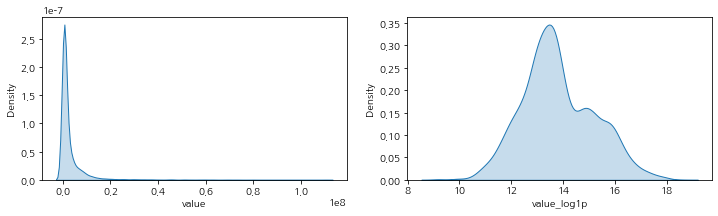

In [29]:
fig,axes = plt.subplots(nrows = 1, ncols =2, figsize = (12,3))
sns.kdeplot(train['value'], fill = True, ax = axes[0])
sns.kdeplot(train['value_log1p'], fill = True, ax = axes[1])

In [30]:
train['value'].skew(), train['value'].kurt()

(5.885798215027292, 52.05051473763727)

In [31]:
train['value_log1p'].skew() ,  train["value_log1p"].kurt()

(0.30879767174080225, -0.19954364048482764)

<AxesSubplot:xlabel='reputation', ylabel='stat_overall'>

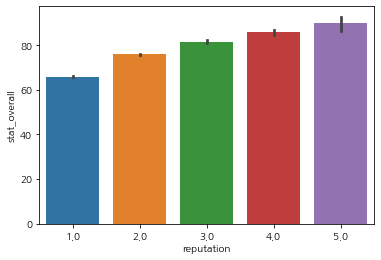

In [32]:
sns.barplot(data = train,x ="reputation" , y ='stat_overall')

<AxesSubplot:xlabel='reputation', ylabel='value'>

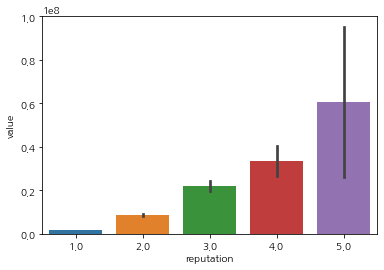

In [33]:
sns.barplot(data = train, x = "reputation", y = "value")

<AxesSubplot:xlabel='stat_potential', ylabel='value'>

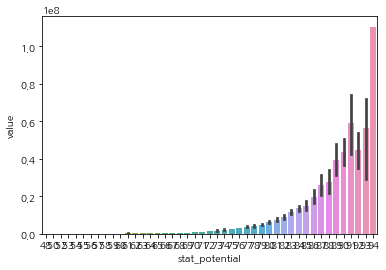

In [34]:
sns.barplot(data = train,x ="stat_potential" , y ='value')

In [35]:
corr = train.corr()
corr

,age,contract_until,reputation,stat_overall,stat_potential,stat_skill_moves,value,right_foot,position_MF,position_DF,position_ST,position_GK,continent_E,continent_Sa,continent_A,continent_Af,continent_O,value_log1p
age,1.000000,-0.132052,0.263468,0.467345,-0.231303,0.039362,0.087319,0.007760,-0.046136,0.059474,-0.049141,0.044823,-0.104937,0.129006,0.006852,-0.001488,-0.022411,0.184635
contract_until,-0.132052,1.000000,0.070446,0.156983,0.258477,0.082641,0.228638,-0.004760,0.018126,-0.010573,0.011158,-0.026230,-0.085970,0.083893,0.051768,0.001904,-0.054209,0.214345
reputation,0.263468,0.070446,1.000000,0.521389,0.399183,0.196582,0.665982,0.003859,0.008883,-0.020679,0.026791,-0.016637,0.046014,-0.000129,-0.055924,-0.006171,-0.036035,0.480683
stat_overall,0.467345,0.156983,0.521389,1.000000,0.665453,0.400164,0.658444,-0.036585,0.032464,0.020955,0.014821,-0.099001,-0.001432,0.118782,-0.168241,0.041090,-0.084138,0.938548
stat_potential,-0.231303,0.258477,0.399183,0.665453,1.000000,0.332578,0.611907,-0.029030,0.049390,-0.036676,0.046471,-0.079903,0.079171,0.055883,-0.196688,0.017984,-0.079259,0.793474
stat_skill_moves,0.039362,0.082641,0.196582,0.400164,0.332578,1.000000,0.298500,-0.109107,0.363413,-0.143230,0.237923,-0.644243,-0.046998,0.053987,-0.057077,0.078053,-0.030498,0.476796
value,0.087319,0.228638,0.665982,0.658444,0.611907,0.298500,1.000000,-0.008204,0.046358,-0.054749,0.045879,-0.048034,0.031069,0.036327,-0.092792,0.009821,-0.047345,0.694398
right_foot,0.007760,-0.004760,0.003859,-0.036585,-0.029030,-0.109107,-0.008204,1.000000,0.021210,-0.145008,0.051707,0.115595,-0.010082,-0.009650,0.003347,0.025326,0.007714,-0.038607
position_MF,-0.046136,0.018126,0.008883,0.032464,0.049390,0.363413,0.046358,0.021210,1.000000,-0.532037,-0.383323,-0.281475,-0.016665,-0.003672,0.026768,0.009540,-0.003593,0.086290
position_DF,0.059474,-0.010573,-0.020679,0.020955,-0.036676,-0.143230,-0.054749,-0.145008,-0.532037,1.000000,-0.327449,-0.240446,0.022654,0.004032,-0.011006,-0.034841,-0.001190,-0.034146


In [36]:
mask = np.triu(np.ones_like(corr))

<AxesSubplot:>

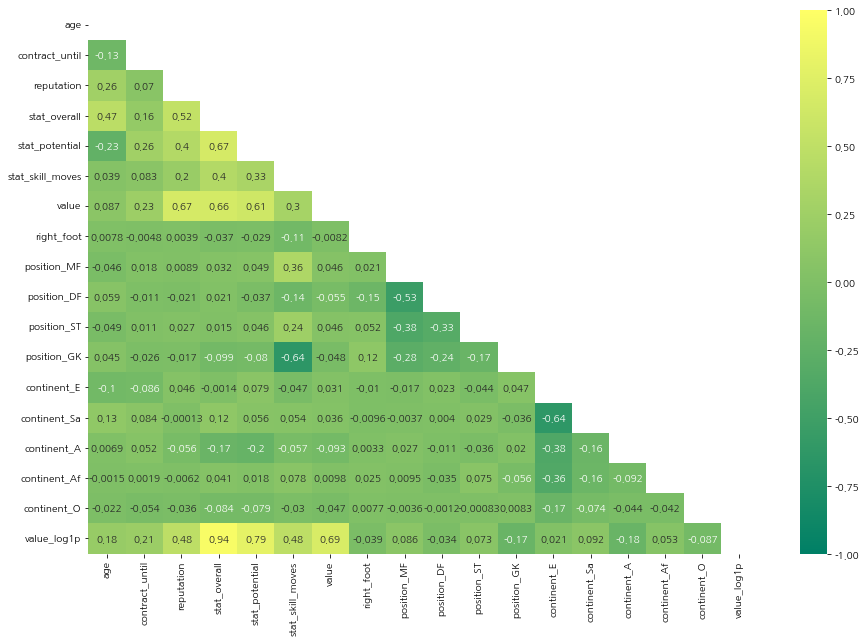

In [37]:
plt.figure(figsize = (15,10))
sns.heatmap(corr, annot = True, cmap = 'summer',vmax = 1, vmin = -1, mask = mask)

In [38]:
corr.loc["reputation", "value"]

0.6659824178835521

In [39]:
train.columns

Index(['age', 'continent', 'contract_until', 'position', 'prefer_foot',
       'reputation', 'stat_overall', 'stat_potential', 'stat_skill_moves',
       'value', 'right_foot', 'position_MF', 'position_DF', 'position_ST',
       'position_GK', 'continent_E', 'continent_Sa', 'continent_A',
       'continent_Af', 'continent_O', 'value_log1p'],
      dtype='object')

In [40]:
label_name = "value_log1p"

In [41]:
feature_names = ['age', 'contract_until','reputation', 'stat_overall',
                 'stat_potential', 'stat_skill_moves',"right_foot",'position_MF', 'position_DF',
       'position_ST', 'position_GK','continent_Sa', 'continent_A','continent_Af', 'continent_O']

In [42]:
X_train = train[feature_names]
print(X_train.shape)
X_train.head(4)

(8932, 15)


,age,contract_until,reputation,stat_overall,stat_potential,stat_skill_moves,right_foot,position_MF,position_DF,position_ST,position_GK,continent_Sa,continent_A,continent_Af,continent_O
0,31,2021,5.0,94,94,4.0,False,False,False,True,False,True,False,False,False
1,27,2020,4.0,91,93,1.0,True,False,False,False,True,False,False,False,False
2,31,2021,5.0,91,91,3.0,True,False,False,True,False,True,False,False,False
3,32,2020,4.0,91,91,3.0,True,False,True,False,False,False,False,False,False


In [43]:
X_test = test[feature_names]
print(X_test.shape)
X_test.head(4)

(3828, 15)


,age,contract_until,reputation,stat_overall,stat_potential,stat_skill_moves,right_foot,position_MF,position_DF,position_ST,position_GK,continent_Sa,continent_A,continent_Af,continent_O
0,33,2022,5.0,94,94,5.0,True,False,False,True,False,False,False,False,False
1,26,2022,5.0,92,93,5.0,True,False,False,True,False,True,False,False,False
2,27,2023,4.0,91,92,4.0,True,True,False,False,False,False,False,False,False
3,27,2020,4.0,91,91,4.0,True,False,False,True,False,False,False,False,False


In [44]:
y_train = train[label_name]
print(y_train.shape)
y_train.head(4)

(8932,)


0    18.520526
1    18.092177
2    18.197537
3    17.747336
Name: value_log1p, dtype: float64

In [45]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(random_state= 42, n_jobs= -1)
model

RandomForestRegressor(n_jobs=-1, random_state=42)

In [46]:
import sklearn
sklearn.metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'matthews_corrcoef', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_s

In [47]:
np.random.randint(3,100,10)

array([55,  7, 19, 99, 50, 40, 11, 33, 48, 79])

In [48]:
np.random.uniform(0.1,1,20)

array([0.51338093, 0.76713123, 0.24010964, 0.71874779, 0.48462904,
       0.1851088 , 0.77058734, 0.70275575, 0.88088354, 0.25272174,
       0.16360724, 0.14240167, 0.31612427, 0.83623187, 0.64252729,
       0.77002605, 0.81036135, 0.83390989, 0.36258919, 0.51281063])

In [49]:
RandomForestRegressor(max_depth= 20, max_features=0.1, n_jobs= -1,
                     random_state=42)

RandomForestRegressor(max_depth=20, max_features=0.1, n_jobs=-1,
                      random_state=42)

In [50]:
from sklearn.model_selection import RandomizedSearchCV

param_distributions = {"max_depth":np.random.randint(3,100,10),
                      "max_features": np.random.uniform(0.1,1,20)}

reg = RandomizedSearchCV(model, param_distributions= param_distributions,
                        scoring="neg_root_mean_squared_error",
                        n_iter = 21, cv = 10, n_jobs = -1,
                        verbose = 6, random_state= 42)
reg.fit(X_train,y_train)

Fitting 10 folds for each of 21 candidates, totalling 210 fits


RandomizedSearchCV(cv=10,
                   estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
                   n_iter=21, n_jobs=-1,
                   param_distributions={'max_depth': array([56, 17, 32, 11, 97, 17, 89, 81, 59, 35]),
                                        'max_features': array([0.85884643, 0.27043575, 0.13638714, 0.30250594, 0.51614327,
       0.39097866, 0.77640306, 0.829663  , 0.55387026, 0.57986915,
       0.27535367, 0.82288752, 0.28042904, 0.43000102, 0.669697  ,
       0.17802673, 0.66307335, 0.48219877, 0.38659423, 0.89206603])},
                   random_state=42, scoring='neg_root_mean_squared_error',
                   verbose=6)

In [51]:
reg.best_estimator_

RandomForestRegressor(max_depth=32, max_features=0.6630733523871821, n_jobs=-1,
                      random_state=42)

In [52]:
rmsle = abs(reg.best_score_)
rmsle

0.28493866501649784

In [53]:
pd.DataFrame(reg.cv_results_).sort_values("rank_test_score")

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
16,1.354552,0.130563,0.056857,0.020910,0.663073,32,"{'max_features': 0.6630733523871821, 'max_dept...",-0.706998,-0.253056,-0.182684,-0.370316,-0.114772,-0.093055,-0.134744,-0.125850,-0.285309,-0.582603,-0.284939,0.199786,1
14,1.496147,0.100440,0.041141,0.009874,0.776403,35,"{'max_features': 0.7764030582351186, 'max_dept...",-0.706089,-0.249130,-0.198706,-0.377339,-0.115764,-0.093729,-0.134717,-0.132257,-0.290286,-0.572388,-0.287040,0.197052,2
8,1.416587,0.107196,0.034473,0.008340,0.669697,59,"{'max_features': 0.6696969965894549, 'max_dept...",-0.707153,-0.255573,-0.189118,-0.372722,-0.116294,-0.095698,-0.141284,-0.131900,-0.291728,-0.579361,-0.288083,0.197726,3
4,1.237428,0.130271,0.045960,0.012775,0.55387,89,"{'max_features': 0.5538702579341308, 'max_dept...",-0.734987,-0.265751,-0.178089,-0.371644,-0.113537,-0.099699,-0.134944,-0.119163,-0.287555,-0.583796,-0.288917,0.206078,4
15,1.100312,0.091236,0.048692,0.022992,0.482199,59,"{'max_features': 0.48219877238316566, 'max_dep...",-0.740718,-0.267093,-0.169705,-0.372651,-0.113478,-0.094378,-0.133349,-0.120839,-0.285710,-0.601206,-0.289913,0.210814,5
20,1.038416,0.203929,0.032188,0.010027,0.516143,89,"{'max_features': 0.5161432704290524, 'max_dept...",-0.740718,-0.267093,-0.169705,-0.372651,-0.113478,-0.094378,-0.133349,-0.120839,-0.285710,-0.601206,-0.289913,0.210814,6
10,1.010504,0.062829,0.040984,0.014378,0.776403,11,"{'max_features': 0.7764030582351186, 'max_dept...",-0.722379,-0.267351,-0.202084,-0.412804,-0.130644,-0.103417,-0.146351,-0.131449,-0.296478,-0.584334,-0.299729,0.200495,7
19,0.899935,0.081667,0.047906,0.018697,0.55387,11,"{'max_features': 0.5538702579341308, 'max_dept...",-0.727276,-0.284952,-0.182120,-0.421044,-0.130908,-0.108800,-0.150100,-0.122067,-0.299171,-0.603541,-0.302998,0.205588,8
6,0.834251,0.094296,0.035851,0.013915,0.579869,11,"{'max_features': 0.5798691459828077, 'max_dept...",-0.727276,-0.284952,-0.182120,-0.421044,-0.130908,-0.108800,-0.150100,-0.122067,-0.299171,-0.603541,-0.302998,0.205588,9
9,0.970542,0.068980,0.051508,0.016979,0.390979,32,"{'max_features': 0.39097865902982276, 'max_dep...",-0.776144,-0.289773,-0.168191,-0.376648,-0.117810,-0.107422,-0.143121,-0.118196,-0.285993,-0.647918,-0.303122,0.223418,10


In [54]:
best_model = reg.best_estimator_
best_model

RandomForestRegressor(max_depth=32, max_features=0.6630733523871821, n_jobs=-1,
                      random_state=42)

In [55]:
from sklearn.model_selection import cross_val_predict

y_valid_predict = cross_val_predict(best_model, X_train, y_train , cv=5, n_jobs= -1 , verbose = 3)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.9s remaining:    1.3s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.9s finished


In [56]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_train, y_valid_predict)

0.36676669589581046

In [57]:
((y_train - y_valid_predict)**2).mean()

0.3667666958958103

In [58]:
mean_squared_error(y_train, y_valid_predict) ** 0.5

0.6056126616046023

In [59]:
((y_train - y_valid_predict)**2).mean() **0.5

0.6056126616046021

In [60]:
np.sqrt((y_train - y_valid_predict)).mean()

/Users/eun-yeong/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


0.5678285003952048

In [61]:
y_predict =best_model.fit(X_train, y_train).predict(X_test)
y_predict[:5]

array([17.89444537, 18.17031353, 18.00398137, 18.03891237, 17.88934011])

<AxesSubplot:>

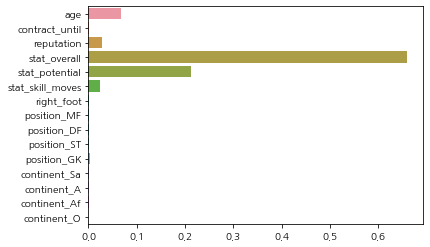

In [62]:
sns.barplot(x=best_model.feature_importances_, y=best_model.feature_names_in_)

In [63]:
df_submit = pd.read_csv(f"{base_path}/submission.csv")
df_submit.shape

(3828, 2)

In [64]:
df_submit.head(2)

,id,value
0,1,0
1,2,0


In [65]:
df_submit["value"] = np.expm1(y_predict)
df_submit.head(3)

,id,value
0,1,5.908250e+07
1,2,7.785148e+07
2,4,6.592191e+07


In [66]:
file_name = f"{base_path}/submit_{rmsle:.5f}.csv"
file_name

'FIFA/submit_0.28494.csv'

In [67]:
df_submit.to_csv(file_name,index = False)

In [68]:
pd.read_csv(file_name)

,id,value
0,1,5.908250e+07
1,2,7.785148e+07
2,4,6.592191e+07
3,5,6.826531e+07
4,6,5.878164e+07
...,...,...
3823,16924,6.020296e+04
3824,16929,4.932974e+04
3825,16932,5.898148e+04
3826,16937,4.911762e+04


[CV 8/10] END max_depth=97, max_features=0.1780267270680957;, score=-0.187 total time=   0.8s
[CV 5/10] END max_depth=56, max_features=0.1780267270680957;, score=-0.168 total time=   0.8s
[CV 4/10] END max_depth=17, max_features=0.2753536654297438;, score=-0.393 total time=   1.1s
[CV 3/10] END max_depth=81, max_features=0.38659423341146926;, score=-0.168 total time=   0.9s
[CV 8/10] END max_depth=81, max_features=0.38659423341146926;, score=-0.118 total time=   1.2s
[CV 8/10] END max_depth=89, max_features=0.5538702579341308;, score=-0.119 total time=   1.5s
[CV 7/10] END max_depth=17, max_features=0.1780267270680957;, score=-0.188 total time=   0.6s
[CV 4/10] END max_depth=11, max_features=0.5798691459828077;, score=-0.421 total time=   0.8s
[CV 2/10] END max_depth=59, max_features=0.2753536654297438;, score=-0.303 total time=   1.0s
[CV 10/10] END max_depth=59, max_features=0.2753536654297438;, score=-0.694 total time=   0.9s
[CV 8/10] END max_depth=59, max_features=0.66969699658945

[CV 2/10] END max_depth=97, max_features=0.1780267270680957;, score=-0.377 total time=   0.8s
[CV 1/10] END max_depth=56, max_features=0.1780267270680957;, score=-0.926 total time=   0.7s
[CV 9/10] END max_depth=56, max_features=0.1780267270680957;, score=-0.279 total time=   0.8s
[CV 6/10] END max_depth=17, max_features=0.2753536654297438;, score=-0.119 total time=   1.2s
[CV 4/10] END max_depth=81, max_features=0.38659423341146926;, score=-0.377 total time=   1.0s
[CV 2/10] END max_depth=89, max_features=0.5538702579341308;, score=-0.266 total time=   1.5s
[CV 10/10] END max_depth=89, max_features=0.5538702579341308;, score=-0.584 total time=   1.2s
[CV 1/10] END max_depth=11, max_features=0.5798691459828077;, score=-0.727 total time=   0.9s
[CV 10/10] END max_depth=11, max_features=0.5798691459828077;, score=-0.604 total time=   0.8s
[CV 7/10] END max_depth=59, max_features=0.2753536654297438;, score=-0.146 total time=   0.9s
[CV 5/10] END max_depth=59, max_features=0.66969699658945